# RL tabular MM analysis
Set parameters, optionally run `mm_compare` with `--mm-type rl_tabular`, then plot PnL, rewards, actions, inventory, and spread.

In [22]:
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_colwidth', None)

# ---- parameters ----
run_simulation = True  # set True to launch a run from the notebook
run_simple_simulation = True  # set True to run simple MM
seed = 96765
ticker = 'AAPL'
historical_date = '20000101'
start_time = '00:00:01'
end_time = '47:59:00'
mm_type = 'rl_tabular'
simple_mm_type = 'simple'
log_name = f'rl_tabular_seed_{seed}'
simple_log_name = f'simple_seed_{seed}'
repo_root = Path('..')
log_dir = repo_root / 'log' / log_name
simple_log_dir = repo_root / 'log' / simple_log_name
# --------------------

print('Log dir:', log_dir.resolve())
print('Simple log dir:', simple_log_dir.resolve())


Log dir: /Users/salim/Desktop/Columbia/Assignments_Columbia/S3/Reinforcement Learning/Project/ABIDES/abides/log/rl_tabular_seed_96765
Simple log dir: /Users/salim/Desktop/Columbia/Assignments_Columbia/S3/Reinforcement Learning/Project/ABIDES/abides/log/simple_seed_96765


## Run simulation (optional)

In [23]:
if run_simulation:
    cmd = [
        'python', 'abides.py',
        '-c', 'mm_compare',
        '-t', ticker,
        '-d', historical_date,
        '--start-time', start_time,
        '--end-time', end_time,
        '--seed', str(seed),
        '--log_dir', log_name,
        '--mm-type', mm_type,
    ]
    print('Running RL tabular:', ' '.join(cmd))
    result = subprocess.run(cmd, cwd=repo_root)
    print('Return code:', result.returncode)
else:
    print('Skipping RL simulation; set run_simulation=True to execute.')

if run_simple_simulation:
    cmd_simple = [
        'python', 'abides.py',
        '-c', 'mm_compare',
        '-t', ticker,
        '-d', historical_date,
        '--start-time', start_time,
        '--end-time', end_time,
        '--seed', str(seed),
        '--log_dir', simple_log_name,
        '--mm-type', simple_mm_type,
    ]
    print('Running simple MM:', ' '.join(cmd_simple))
    result_simple = subprocess.run(cmd_simple, cwd=repo_root)
    print('Return code simple:', result_simple.returncode)
else:
    print('Skipping simple MM run; set run_simple_simulation=True to execute.')


Running RL tabular: python abides.py -c mm_compare -t AAPL -d 20000101 --start-time 00:00:01 --end-time 47:59:00 --seed 96765 --log_dir rl_tabular_seed_96765 --mm-type rl_tabular
ABIDES: Agent-Based Interactive Discrete Event Simulation

Simulation Start Time: 2025-12-02 17:23:32.357092
Configuration seed: 96765


--- Simulation time: 2000-01-01 00:00:00, messages processed: 0, wallclock elapsed: 0 days 00:00:00.000010 ---


--- Simulation time: 2000-01-01 04:42:11.318531104, messages processed: 100000, wallclock elapsed: 0 days 00:00:05.144897 ---


--- Simulation time: 2000-01-01 08:58:23.199099821, messages processed: 200000, wallclock elapsed: 0 days 00:00:11.666173 ---


--- Simulation time: 2000-01-01 13:14:04.424338765, messages processed: 300000, wallclock elapsed: 0 days 00:00:18.361375 ---


--- Simulation time: 2000-01-01 17:34:20.917250806, messages processed: 400000, wallclock elapsed: 0 days 00:00:25.913020 ---


--- Simulation time: 2000-01-01 21:55:08.966084905, message

Processing orderbook log: 100%|██████████| 127351/127351 [00:03<00:00, 32585.94it/s]


Order book logging complete!
Time taken to log the order book: 0:00:21.292151
Order book archival complete.
Event Queue elapsed: 0 days 00:01:33.101489, messages: 1071499, messages per second: 11508.9
Mean ending value by agent type:
ValueAgent: 272601
RLTabularMarketMakerAgent: -1358631
Simulation ending!
Simulation End Time: 2025-12-02 17:25:42.600187
Time taken to run simulation: 0:02:10.243095
Return code: 0
Running simple MM: python abides.py -c mm_compare -t AAPL -d 20000101 --start-time 00:00:01 --end-time 47:59:00 --seed 96765 --log_dir simple_seed_96765 --mm-type simple
ABIDES: Agent-Based Interactive Discrete Event Simulation

Simulation Start Time: 2025-12-02 17:26:13.134698
Configuration seed: 96765


--- Simulation time: 2000-01-01 00:00:00, messages processed: 0, wallclock elapsed: 0 days 00:00:00.000050 ---


--- Simulation time: 2000-01-01 03:25:29.088533825, messages processed: 100000, wallclock elapsed: 0 days 00:00:04.169171 ---


--- Simulation time: 2000-01-01 06:5

Processing orderbook log: 100%|██████████| 169898/169898 [00:04<00:00, 41447.65it/s]


Order book logging complete!
Time taken to log the order book: 0:00:19.667808
Order book archival complete.
Event Queue elapsed: 0 days 00:04:08.458494, messages: 1417624, messages per second: 5705.7
Mean ending value by agent type:
ValueAgent: 1333331
MarketMakerAgent: -6666656
Simulation ending!
Simulation End Time: 2025-12-02 17:31:05.267175
Time taken to run simulation: 0:04:52.132477
Return code simple: 0


## Load logs

In [15]:
summary_path = log_dir / 'summary_log.bz2'
orderbook_file = next(log_dir.glob('ORDERBOOK_*_FULL.bz2'), None)
if not summary_path.exists():
    raise FileNotFoundError(summary_path)

summary = pd.read_pickle(summary_path)
summary.head()

,AgentID,AgentStrategy,EventType,Event
0,1,ValueAgent,STARTING_CASH,10000000.0
1,2,ValueAgent,STARTING_CASH,10000000.0
2,3,ValueAgent,STARTING_CASH,10000000.0
3,4,ValueAgent,STARTING_CASH,10000000.0
4,5,ValueAgent,STARTING_CASH,10000000.0


### Summary PnL by strategy

In [16]:
wide = summary.pivot_table(index=['AgentID', 'AgentStrategy'], columns='EventType', values='Event', aggfunc='first')
wide['PNL'] = wide['ENDING_CASH'] - wide['STARTING_CASH']
wide.reset_index().sort_values('PNL', ascending=False).head(10)

EventType,AgentID,AgentStrategy,ENDING_CASH,FINAL_CASH_POSITION,FINAL_VALUATION,STARTING_CASH,PNL
3,4,ValueAgent,10207675.0,18159307.0,0.805724,10000000.0,207675.0
4,5,ValueAgent,10095157.0,16211797.0,0.610973,10000000.0,95157.0
1,2,ValueAgent,10094081.0,12744625.0,0.274462,10000000.0,94081.0
2,3,ValueAgent,10071414.0,-8176562.0,-1.797242,10000000.0,71414.0
0,1,ValueAgent,10014139.0,13174403.0,0.317440,10000000.0,14139.0
5,6,RLTabularMarketMakerAgent,9517534.0,7886430.0,NaN,10000000.0,-482466.0


## RL tabular agent log

In [370]:
#rl_files = list(log_dir.glob('RL_TABULAR_MARKET_MAKER_AGENT_*.bz2'))
#if not rl_files:
#    raise FileNotFoundError('No RL_TABULAR_MARKET_MAKER_AGENT logs found')
#rl_log = pd.read_pickle(rl_files[0])
#print('RL log columns:', list(rl_log.columns))
#rl_log.head()

### Simple MM log


In [371]:
#simple_files = list(simple_log_dir.glob('MARKET_MAKER_AGENT_*.bz2'))
#if simple_files:
#    simple_log = pd.read_pickle(simple_files[0])
#    print('Simple MM log columns:', list(simple_log.columns))
#    simple_state_rows = simple_log[simple_log['EventType'] == 'STATE']
#else:
#    simple_state_rows = pd.DataFrame()
#    print('No simple MM log found')


### MTM comparison (RL vs simple)


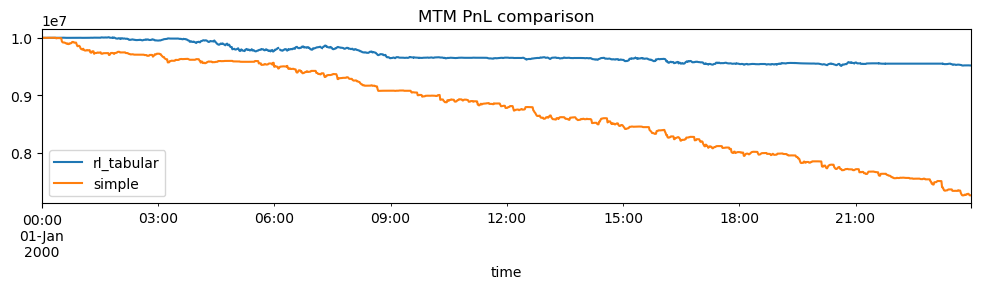

In [24]:
# MTM comparison (aligned on time index)
if 'state_rows' not in globals():
    rl_files = list(log_dir.glob('RL_TABULAR_MARKET_MAKER_AGENT_*.bz2'))
    rl_log = pd.read_pickle(rl_files[0]) if rl_files else pd.DataFrame()
    state_rows = rl_log[rl_log['EventType'] == 'STATE'] if not rl_log.empty else pd.DataFrame()
if 'simple_state_rows' not in globals():
    simple_files = list(simple_log_dir.glob('MARKET_MAKER_AGENT_*.bz2'))
    simple_log = pd.read_pickle(simple_files[0]) if simple_files else pd.DataFrame()
    simple_state_rows = simple_log[simple_log['EventType'] == 'STATE'] if not simple_log.empty else pd.DataFrame()

if not state_rows.empty and not simple_state_rows.empty:
    rl_state = pd.DataFrame(list(state_rows['Event'])).set_index('time')
    rl_state.index = pd.to_datetime(rl_state.index)
    simple_state = pd.DataFrame(list(simple_state_rows['Event'])).set_index('time')
    simple_state.index = pd.to_datetime(simple_state.index)
    df = pd.concat([rl_state['mtm'].rename('rl_tabular'), simple_state['mtm'].rename('simple')], axis=1)
    df = df.sort_index()
    # resample to 1-minute grid for alignment (adjust freq if needed)
    df_resampled = df.resample('1T').last()
    ax = df_resampled.plot(figsize=(10,3), title='MTM PnL comparison')
    plt.legend()
    plt.tight_layout()
else:
    print('Missing STATE events for RL or simple MM')


### Inventory comparison (RL vs simple)


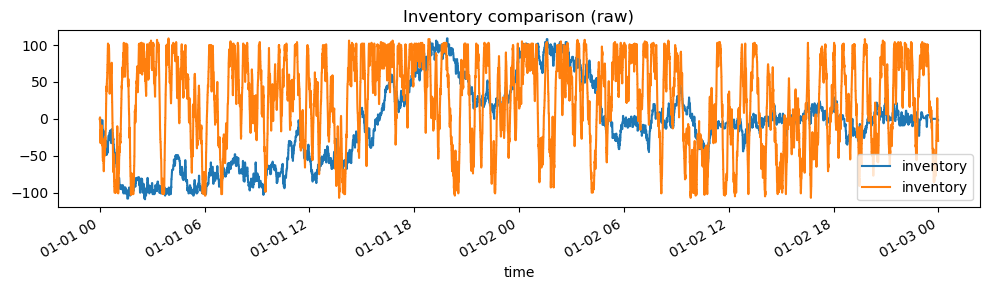

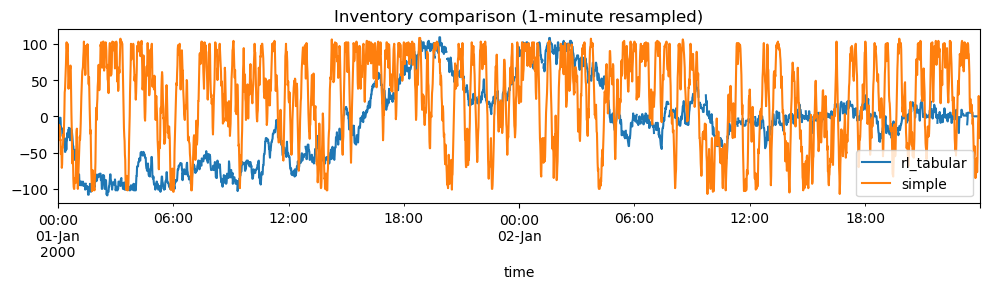

In [25]:
# Plot inventories on common time grid
# Recompute from logs to avoid re-use issues
rl_files = list(log_dir.glob('RL_TABULAR_MARKET_MAKER_AGENT_*.bz2'))
rl_log = pd.read_pickle(rl_files[0]) if rl_files else pd.DataFrame()
state_rows_rl = rl_log[rl_log['EventType'] == 'STATE'] if not rl_log.empty else pd.DataFrame()
simple_files = list(simple_log_dir.glob('MARKET_MAKER_AGENT_*.bz2'))
simple_log = pd.read_pickle(simple_files[0]) if simple_files else pd.DataFrame()
state_rows_simple = simple_log[simple_log['EventType'] == 'STATE'] if not simple_log.empty else pd.DataFrame()

if not state_rows_rl.empty and not state_rows_simple.empty:
    rl_state = pd.DataFrame(list(state_rows_rl['Event'])).set_index('time')
    rl_state.index = pd.to_datetime(rl_state.index)
    simple_state = pd.DataFrame(list(state_rows_simple['Event'])).set_index('time')
    simple_state.index = pd.to_datetime(simple_state.index)
    # plot raw inventories
    ax = rl_state[['inventory']].plot(figsize=(10,3), title='Inventory comparison (raw)', label='rl_tabular')
    simple_state[['inventory']].plot(ax=ax, label='simple')
    plt.legend()
    plt.tight_layout()
    # aligned on 1-minute grid
    df = pd.concat([rl_state['inventory'].rename('rl_tabular'), simple_state['inventory'].rename('simple')], axis=1)
    df = df.sort_index()
    df_resampled = df.resample('1T').last()
    df_resampled.plot(figsize=(10,3), title='Inventory comparison (1-minute resampled)')
    plt.legend()
    plt.tight_layout()
else:
    print('Missing STATE events for RL or simple MM')


### Inventory, cash, MTM, spread, actions

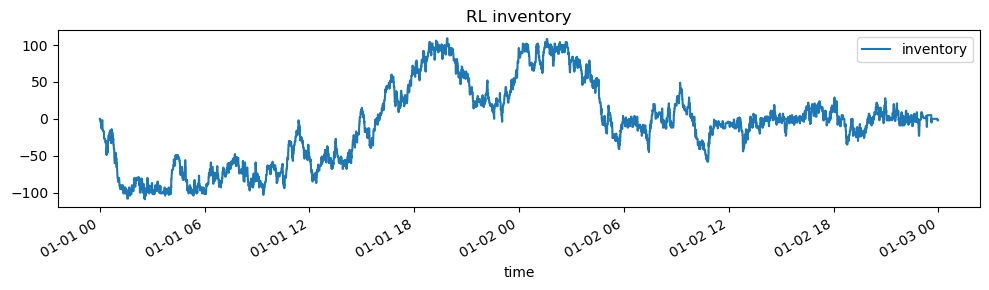

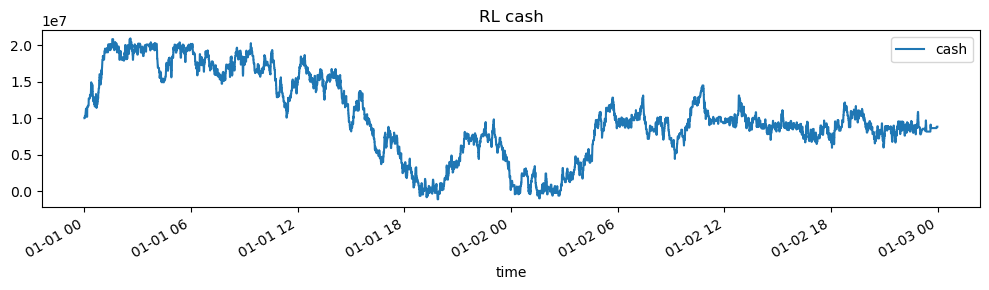

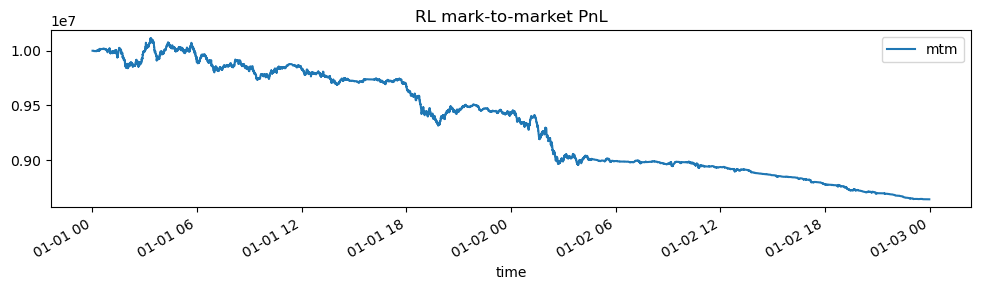

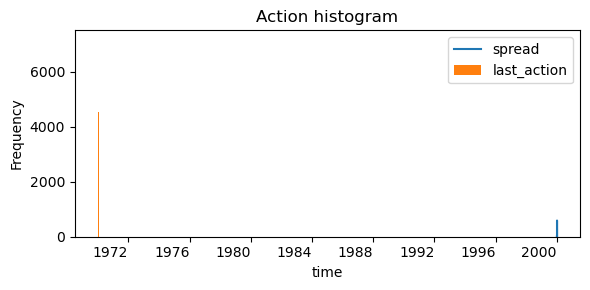

In [41]:
state_rows = rl_log[rl_log['EventType'] == 'STATE']
if not state_rows.empty:
    state_df = pd.DataFrame(list(state_rows['Event']))
    state_df = state_df.set_index('time')
    state_df.index = pd.to_datetime(state_df.index)
    state_df[['inventory']].plot(figsize=(10,3), title='RL inventory', legend=True)
    plt.tight_layout()
    state_df[['cash']].plot(figsize=(10,3), title='RL cash', legend=True)
    plt.tight_layout()
    state_df[['mtm']].plot(figsize=(10,3), title='RL mark-to-market PnL', legend=True)
    plt.tight_layout()
    state_df[['spread']].plot(figsize=(10,3), title='Spread observed by RL', legend=True)
    plt.tight_layout()
    state_df['last_action'].plot(kind='hist', bins=10, figsize=(6,3), title='Action histogram', label='last_action')
    plt.legend()
    plt.tight_layout()
else:
    print('No STATE events found in RL log')

### Spread over time (RL)


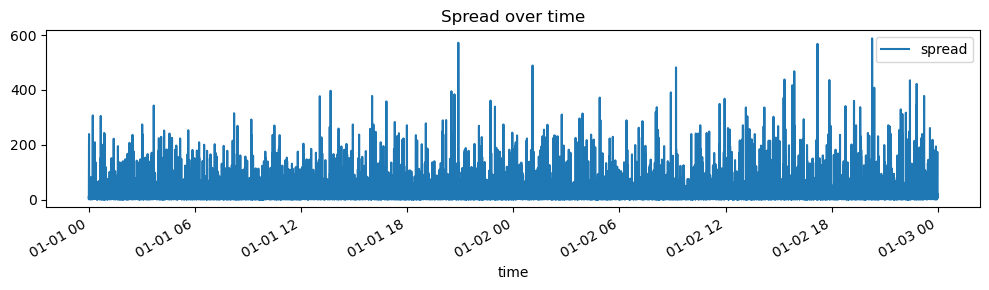

In [42]:
if not state_rows.empty and 'spread' in state_df.columns:
    state_df[['spread']].plot(figsize=(10,3), title='Spread over time', legend=True)
    plt.tight_layout()
else:
    print('No spread data found in RL STATE events')


### Rewards and PnL per step

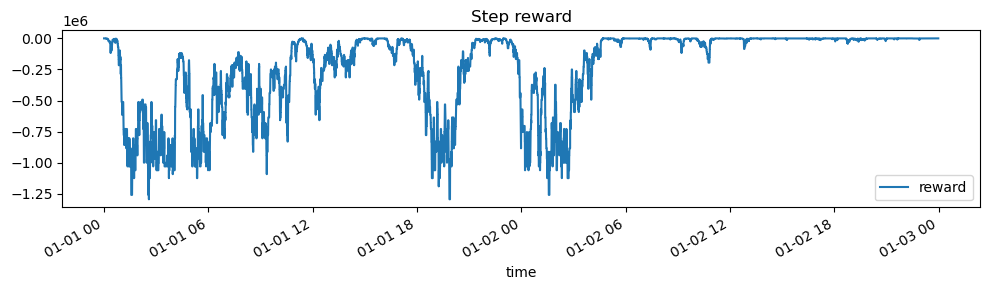

In [44]:
if not state_rows.empty:
    # Plot step reward
    state_df['reward'].plot(figsize=(10,3), title='Step reward', label='reward')
    plt.legend()
    plt.tight_layout()

    # Plot reward rolling mean (100)
    #state_df['reward'].rolling(window=100).mean().plot(figsize=(10,3), title='Reward rolling mean (100)', label='reward_roll100')
    #plt.legend()
    #plt.tight_layout()

    # Plot cumulative reward
    #state_df['cum_reward'].plot(figsize=(10,3), title='Cumulative reward', label='cum_reward')
    #plt.legend()
    #plt.tight_layout()

else:
    print('No STATE events found in RL log')


### Actions over time and Q proxy

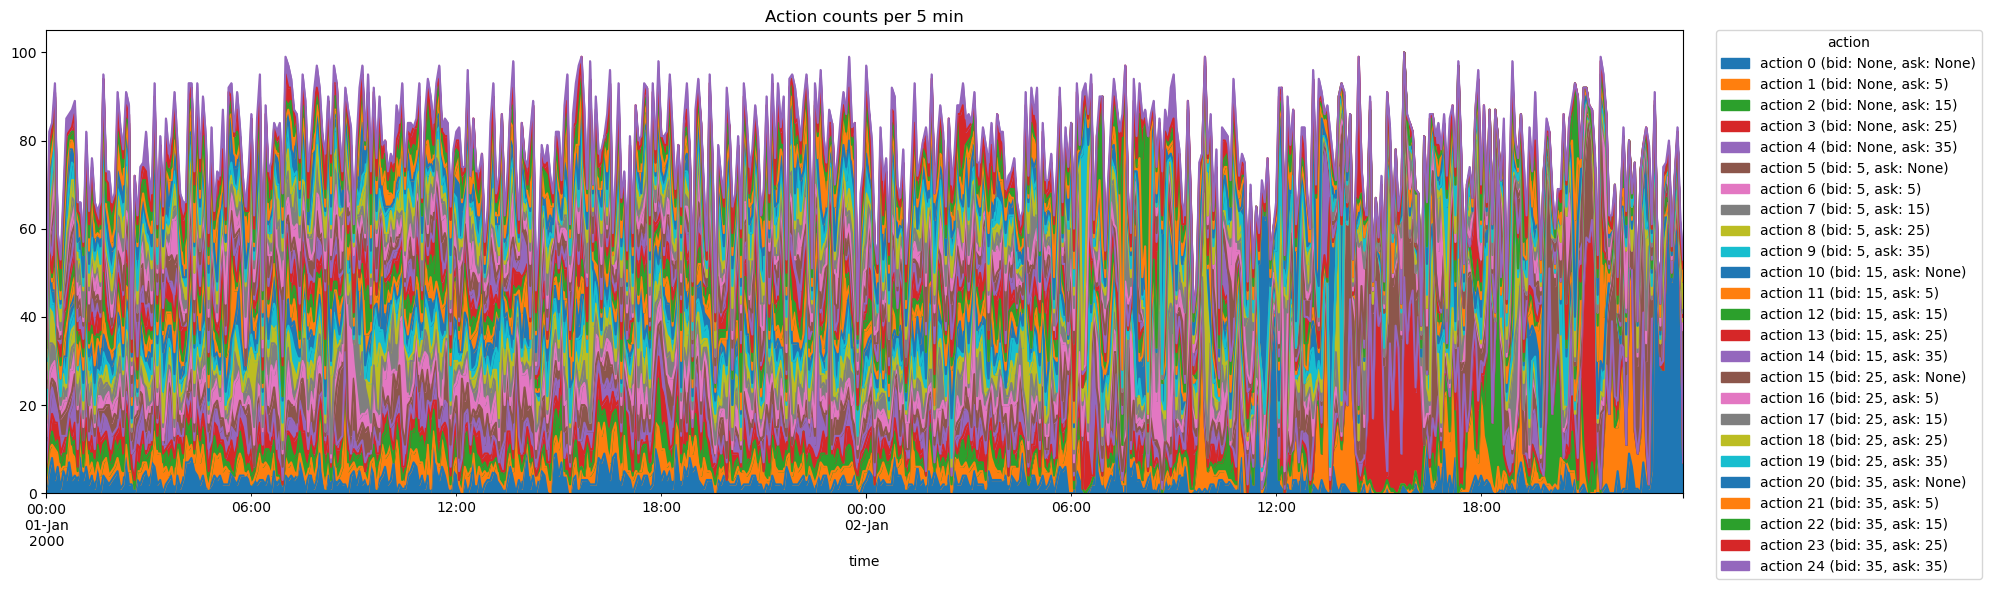

In [38]:
# Build action label map (matches RLTabularMarketMakerAgent order)
offsets = [None, 5, 15, 25, 35]
actions = [(b, a) for b in offsets for a in offsets]  # bid outer, ask inner
action_labels = {i: f"action {i} (bid: {b}, ask: {a})" for i, (b, a) in enumerate(actions)}

# Ensure datetime index
state_df = state_df.copy()
if 'time' in state_df.columns:
    state_df['time'] = pd.to_datetime(state_df['time'])
    state_df = state_df.set_index('time')
state_df = state_df.sort_index()

if not state_df.empty:
    # 5-minute action counts
    action_counts = (
        state_df['last_action']
        .groupby(pd.Grouper(freq='5T'))
        .value_counts()
        .unstack(fill_value=0)
    )
    # Rename columns to human-readable labels (drop any missing actions)
    action_counts = action_counts.rename(columns=action_labels)

    ax = action_counts.plot.area(figsize=(20, 6), title='Action counts per 5 min')
    ax.legend(title='action', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
    plt.tight_layout()
else:
    print('No STATE events found in RL log')


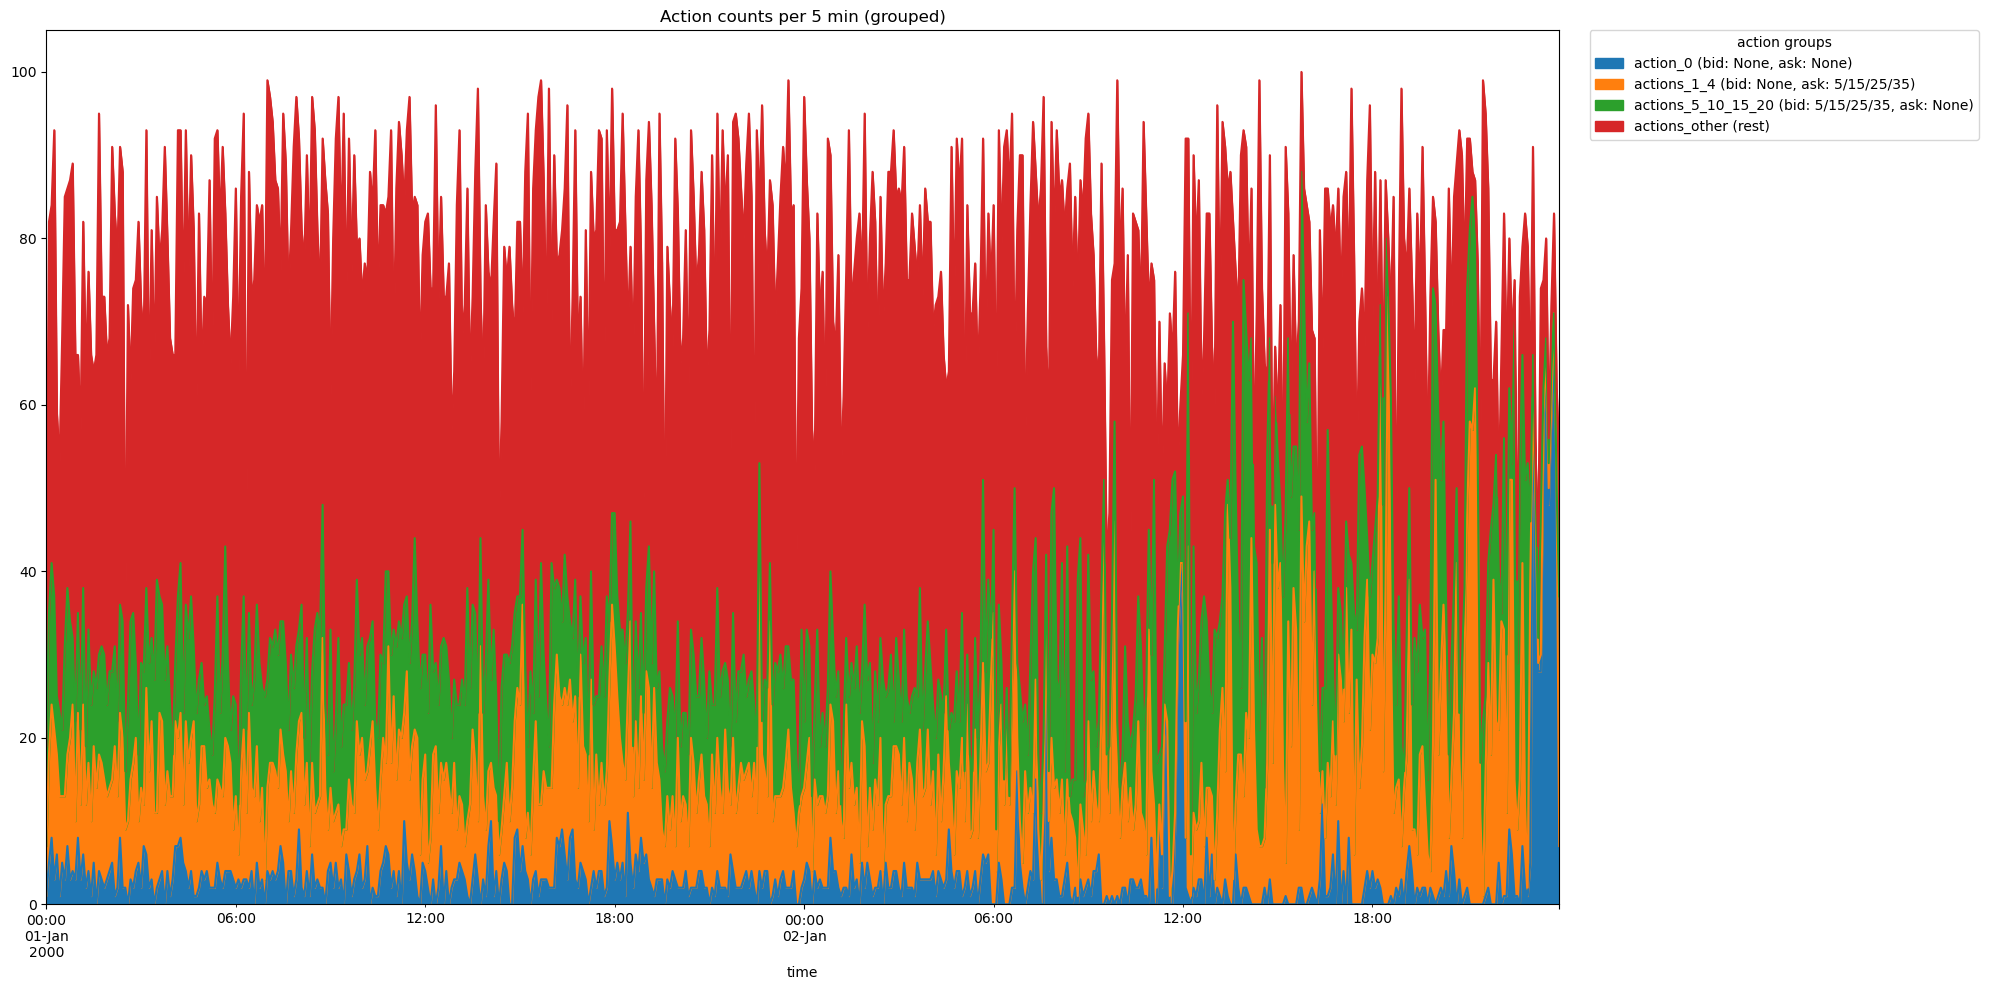

In [39]:
if not state_df.empty:
    action_counts = (
        state_df['last_action']
        .groupby(pd.Grouper(freq='5T'))
        .value_counts()
        .unstack(fill_value=0)
    )

    def sum_cols(df, cols):
        cols = [c for c in cols if c in df.columns]
        return df[cols].sum(axis=1) if cols else pd.Series(0, index=df.index)

    grouped = pd.DataFrame({
        'action_0 (bid: None, ask: None)': sum_cols(action_counts, [0]),
        'actions_1_4 (bid: None, ask: 5/15/25/35)': sum_cols(action_counts, [1, 2, 3, 4]),
        'actions_5_10_15_20 (bid: 5/15/25/35, ask: None)': sum_cols(action_counts, [5, 10, 15, 20]),
        'actions_other (rest)': sum_cols(
            action_counts,
            [c for c in action_counts.columns if c not in {0, 1, 2, 3, 4, 5, 10, 15, 20}]
        ),
    })

    palette = {
        'action_0 (bid: None, ask: None)': '#1f77b4',
        'actions_1_4 (bid: None, ask: 5/15/25/35)': '#ff7f0e',
        'actions_5_10_15_20 (bid: 5/15/25/35, ask: None)': '#2ca02c',
        'actions_other (rest)': '#d62728',
    }

    ax = grouped.plot.area(
        figsize=(20, 10),
        color=[palette[c] for c in grouped.columns],
        title='Action counts per 5 min (grouped)',
    )
    ax.legend(title='action groups', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
    plt.tight_layout()
else:
    print('No STATE events found in RL log')


### State visitation heatmap

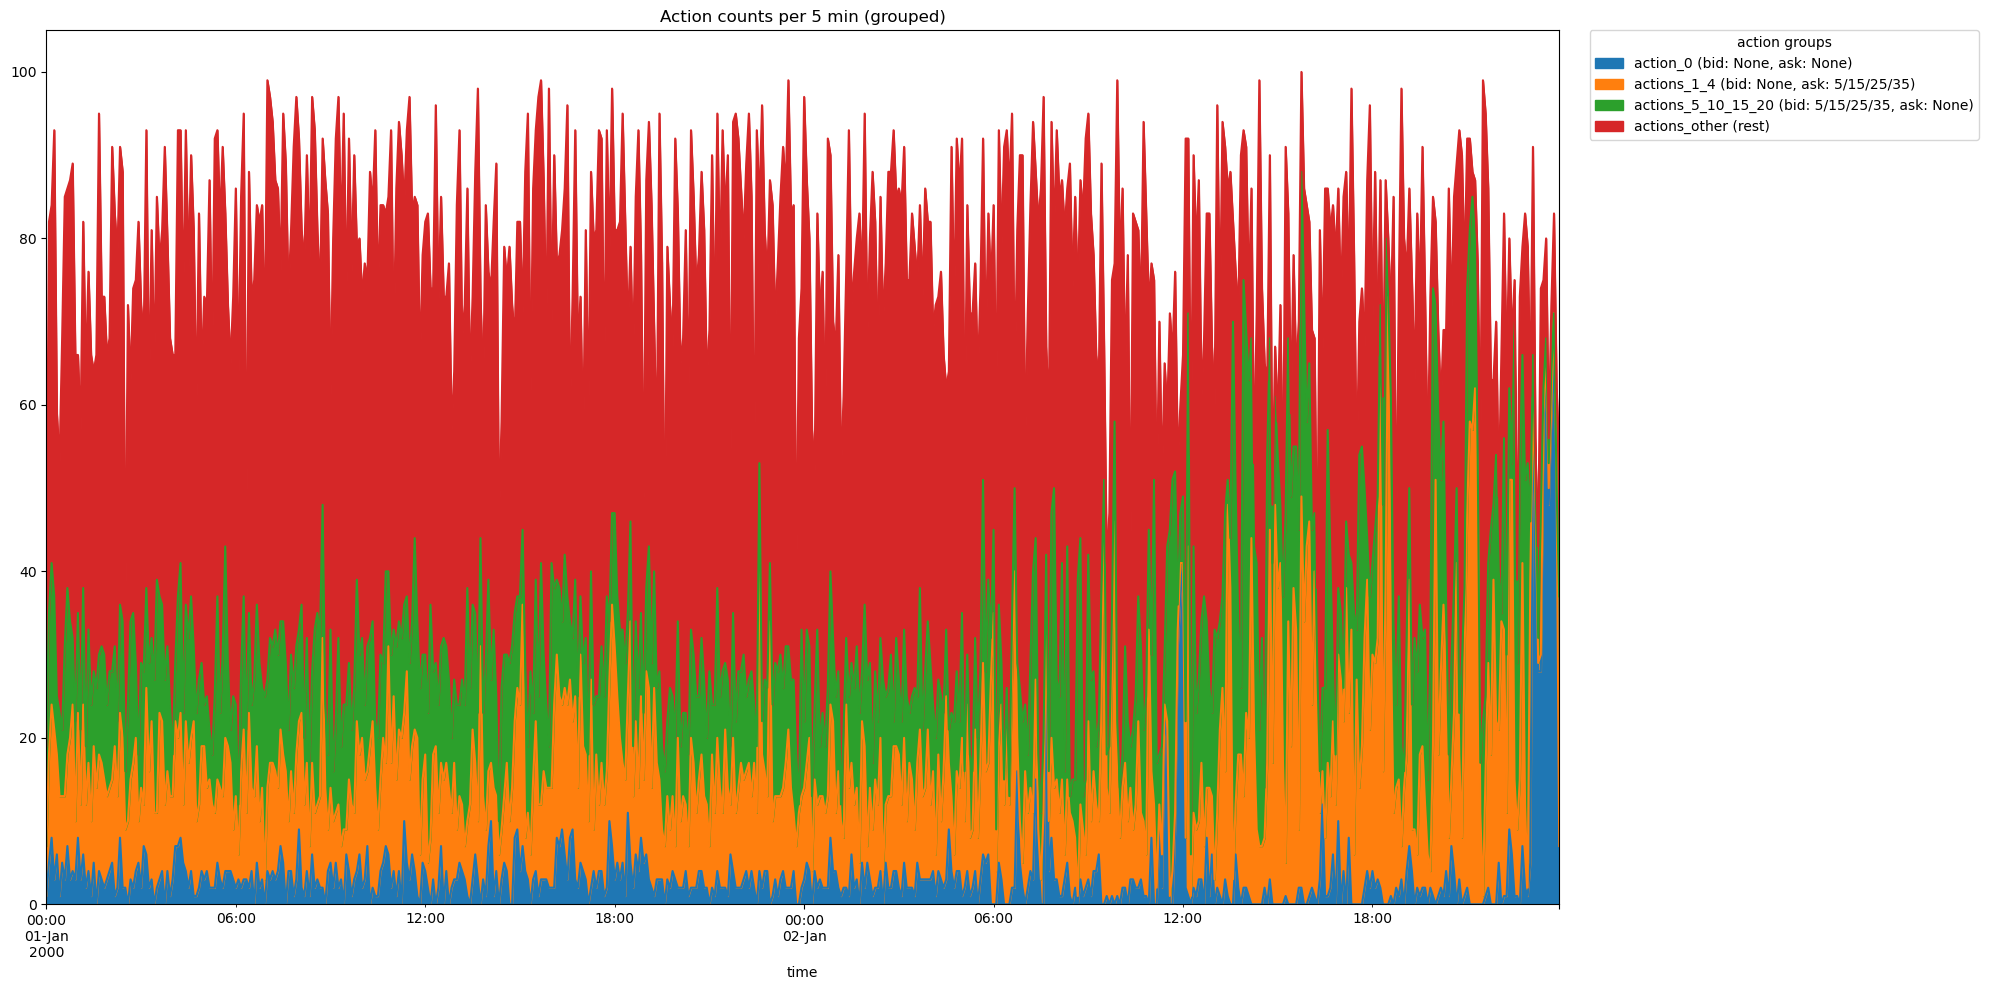

In [45]:
if not state_df.empty:
    action_counts = (
        state_df['last_action']
        .groupby(pd.Grouper(freq='5T'))
        .value_counts()
        .unstack(fill_value=0)
    )

    def sum_cols(df, cols):
        cols = [c for c in cols if c in df.columns]
        return df[cols].sum(axis=1) if cols else pd.Series(0, index=df.index)

    grouped = pd.DataFrame({
        'action_0 (bid: None, ask: None)': sum_cols(action_counts, [0]),
        'actions_1_4 (bid: None, ask: 5/15/25/35)': sum_cols(action_counts, [1, 2, 3, 4]),
        'actions_5_10_15_20 (bid: 5/15/25/35, ask: None)': sum_cols(action_counts, [5, 10, 15, 20]),
        'actions_other (rest)': sum_cols(
            action_counts,
            [c for c in action_counts.columns if c not in {0, 1, 2, 3, 4, 5, 10, 15, 20}]
        ),
    })

    palette = {
        'action_0 (bid: None, ask: None)': '#1f77b4',
        'actions_1_4 (bid: None, ask: 5/15/25/35)': '#ff7f0e',
        'actions_5_10_15_20 (bid: 5/15/25/35, ask: None)': '#2ca02c',
        'actions_other (rest)': '#d62728',
    }

    ax = grouped.plot.area(
        figsize=(20, 10),
        color=[palette[c] for c in grouped.columns],
        title='Action counts per 5 min (grouped)',
    )
    ax.legend(title='action groups', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
    plt.tight_layout()
else:
    print('No STATE events found in RL log')


## Order book and fundamental

Orderbook columns: [97557, 97589, 97591, 97593, 97595, 97597, 97598, 97599, 97600, 97601, 97602, 97603, 97604, 97605, 97613, 97614, 97632, 97640, 97643, 97668, 97669, 97670, 97671, 97672, 97673, 97674, 97675, 97676, 97677, 97678, 97684, 97686, 97739, 97741, 97742, 97743, 97744, 97745, 97746, 97747, 97748, 97749, 97750, 97751, 97752, 97753, 97754, 97755, 97756, 97758, 97759, 97760, 97761, 97762, 97814, 97816, 97817, 97821, 97822, 97828, 97830, 97831, 97832, 97833, 97834, 97835, 97836, 97837, 97838, 97839, 97840, 97841, 97843, 97844, 97845, 97846, 97847, 97848, 97849, 97850, 97851, 97853, 97856, 97858, 97859, 97860, 97861, 97862, 97863, 97864, 97865, 97866, 97867, 97868, 97869, 97870, 97871, 97872, 97873, 97874, 97875, 97876, 97877, 97878, 97881, 97882, 97883, 97886, 97889, 97904, 97905, 97907, 97908, 97912, 97914, 97915, 97917, 97918, 97922, 97925, 97928, 97933, 97936, 97937, 97938, 97939, 97940, 97941, 97942, 97943, 97944, 97945, 97946, 97947, 97948, 97949, 97950, 97951, 97952, 97953, 

,97557,97589,97591,97593,97595,97597,97598,97599,97600,97601,...,104419,104422,104425,104428,104429,104431,104447,104455,104463,104470
QuoteTime,,,,,,,,,,,,,,,,,,,,,
2000-01-01 00:00:01.003366501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-01 00:00:01.009503324,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-01 00:00:01.013722821,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-01 00:00:01.016055951,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-01 00:00:01.016816598,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


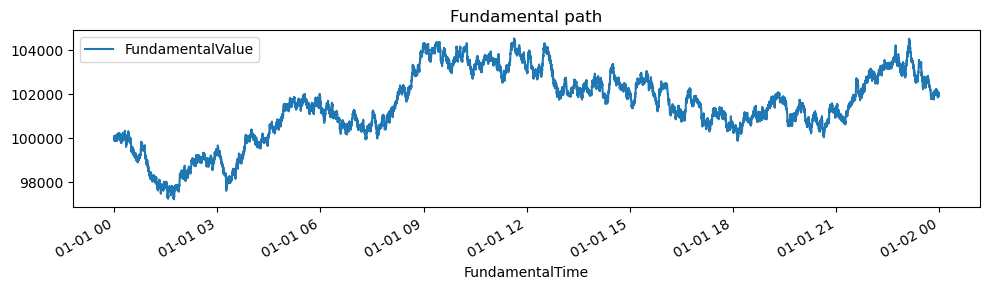

In [12]:
if orderbook_file:
    orderbook = pd.read_pickle(orderbook_file)
    print('Orderbook columns:', list(orderbook.columns))
    def find_col(columns, substrings):
        for col in columns:
            name = ' '.join(col) if isinstance(col, tuple) else str(col)
            lname = name.lower()
            if all(sub in lname for sub in substrings):
                return col
        return None
    bid_price_col = find_col(orderbook.columns, ['best', 'bid']) or find_col(orderbook.columns, ['bid', 'price'])
    ask_price_col = find_col(orderbook.columns, ['best', 'ask']) or find_col(orderbook.columns, ['ask', 'price'])
    if bid_price_col and ask_price_col:
        top = orderbook[[bid_price_col, ask_price_col]].copy()
        top.columns = ['best_bid_price', 'best_ask_price']
        top['mid'] = (top['best_bid_price'] + top['best_ask_price']) / 2
        top['spread'] = top['best_ask_price'] - top['best_bid_price']
        top[['mid']].plot(figsize=(10,3), title='Mid price', legend=True)
        plt.tight_layout()
        top[['spread']].plot(figsize=(10,3), title='Quoted spread', legend=True)
        plt.tight_layout()
    else:
        display(orderbook.head())
else:
    print('Orderbook file not found')

fund_file = next(log_dir.glob('fundamental_*.bz2'), None)
if fund_file:
    fundamental = pd.read_pickle(fund_file).reset_index()
    fundamental.plot(x='FundamentalTime', y='FundamentalValue', legend=True, figsize=(10,3), title='Fundamental path')
    plt.tight_layout()
else:
    print('Fundamental file not found')

### Q-values over time


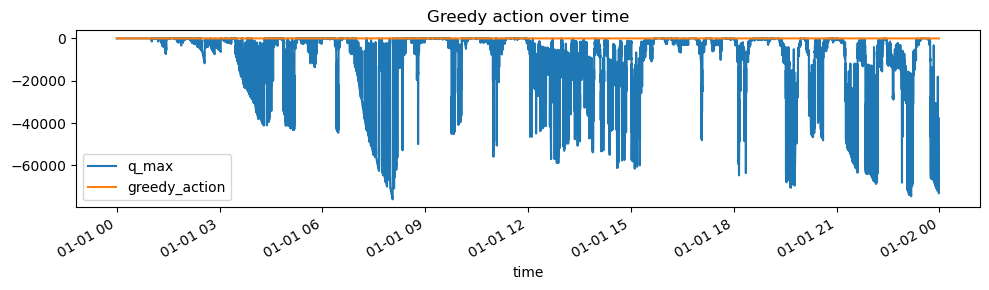

In [343]:
if not state_rows.empty and 'q_max' in state_df.columns:
    state_df['q_max'].plot(figsize=(10,3), title='Max Q for current state', label='q_max')
    plt.legend()
    plt.tight_layout()
    if 'greedy_action' in state_df.columns:
        state_df['greedy_action'].plot(figsize=(10,3), title='Greedy action over time', label='greedy_action')
        plt.legend()
        plt.tight_layout()
else:
    print('No Q info in STATE events')
